In [3]:
import urllib.request as request
import urllib.parse as parse
from pprint import pprint
import json
import numpy as np
import xlsxwriter
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

articles = []
articles1 = []
articles2 = []
articles3 = []
articles4 = []
articles5 = []
articles6 = []

class Crawler(object):
    def __init__(self, url, apikey, start_offset, end_offset):
        self.url = url
        self.apiKey = apikey
        self.startOffset = int(start_offset)
        self.endOffset = int(end_offset)

    def start(self):
        #articles = []
        #articles1 = []
        offsets = np.arange(self.startOffset, self.endOffset)
        
        workbook = xlsxwriter.Workbook('NYTimesMovies.xlsx')
        worksheet = workbook.add_worksheet()
        line = 1
        
        for offset in offsets:
        
            url = self.url + "/reviews/all.json"

            data = {}
            data['api-key'] = self.apiKey
            url_values = parse.urlencode(data)

            # add api key
            url = url + "?" + "offset=" + str(20*offset) + "&" + url_values
            with request.urlopen(url) as response:
                content = response.read()
                content = content.decode('utf-8')
                content = json.loads(content)
                for each in content['results']:
                    if "display_title" in each:
                        display_title = each['display_title']
                    else:
                        continue
                    if "mpaa_rating" in each:
                        mpaa_rating = each['mpaa_rating']
                    else:
                        mpaa_rating = None
                    if "byline" in each:
                        byline = each['byline']
                    else:
                        byline = None
                    if "headline" in each:
                        headline = each['headline']
                    else:
                        headline = None
                    if "summary_short" in each:
                        summary_short = each['summary_short']
                    else:
                        summary_short = None
                    if "publication_date" in each:
                        publication_date = each['publication_date']
                    else:
                        headline = None
                    if "opening_date" in each:
                        opening_date = each['opening_date']
                    else:
                        opening_date = None
                    articles.append({
                        'display_title': display_title, 
                        'mpaa_rating': mpaa_rating,
                        'byline': byline,
                        'headline': headline,
                        'summary_short': summary_short,
                        'publication_date': publication_date,
                        'opening_date': opening_date,
                    })
                    articles1.append({
                        display_title
                    })
                    articles2.append({
                        display_title, 
                        mpaa_rating
                    })
                    articles3.append({
                        summary_short,
                        display_title
                    })
                    articles4.append({
                        display_title, 
                        mpaa_rating,
                        headline
                    })
                    articles5.append({
                        display_title, 
                        mpaa_rating,
                        summary_short
                    })
                    articles6.append({
                        display_title, 
                        mpaa_rating,
                        byline,
                        headline,
                        summary_short
                    })
                    worksheet.write('A'+str(line),display_title)
                    worksheet.write('B'+str(line),mpaa_rating)
                    worksheet.write('C'+str(line),byline)
                    worksheet.write('D'+str(line),headline)
                    worksheet.write('E'+str(line),summary_short)
                    worksheet.write('F'+str(line),publication_date)
                    worksheet.write('G'+str(line),opening_date)
                    line+=1
                
        print(len(articles1))
        with open('newyorktimes.json', 'w') as f:
            for each in articles:
                json.dump(each, f)
                f.write('\n')
        
    def filter(self, path):
        filtered_articles = []
        with open(path, 'r') as f:
            for line in f:
                article = json.loads(line)
                if article['display_title'] is None:
                    continue
                else:
                    filtered_articles.append(article)
        
        print(len(filtered_articles))
        with open('newyorktimes_filtered.json', 'w') as f:
            for each in filtered_articles:
                json.dump(each, f)
                f.write('\n')
        


if __name__ == '__main__':
    crawler = Crawler(
        url = "https://api.nytimes.com/svc/movies/v2",
        apikey='5105d7c0e53347269a428d1c212e7de5',
        start_offset=0,
        end_offset=50
    )

crawler.start()
#crawler.filter('newyorktimes.json1')

1000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


TypeError: __init__() missing 1 required positional argument: 's'

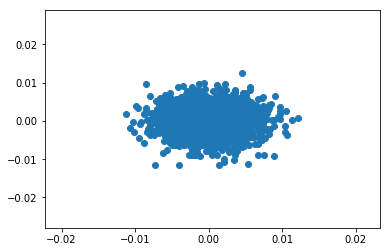

In [7]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

model1 = Word2Vec(articles3, min_count=1)
X1 = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result1 = pca.fit_transform(X1)
pyplot.scatter(result1[:, 0], result1[:, 1])
words1 = list(model1.wv.vocab)
for i, word in enumerate(words1):
    pyplot.annotate(xy=(result1[i, 0], result1[i, 1]))
pyplot.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


TypeError: __init__() missing 1 required positional argument: 's'

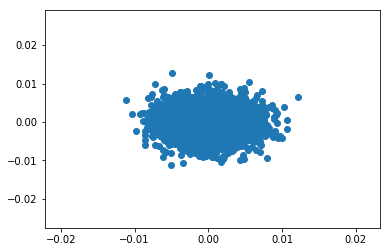

In [8]:
model1 = Word2Vec(articles6, min_count=1)
X1 = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result1 = pca.fit_transform(X1)
pyplot.scatter(result1[:, 0], result1[:, 1])
words1 = list(model1.wv.vocab)
for i, word in enumerate(words1):
    pyplot.annotate(xy=(result1[i, 0], result1[i, 1]))
pyplot.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data_sampley = Word2Vec(articles6, min_count=1)
data_sample = data_sampley[data_sampley.wv.vocab]

data_features = data_sample[:, 1:]
data_labels = data_sample[:, 0]
subSpace = PCA().fit_transform(data_features)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [10]:
def plot_embedding(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [24]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [12]:
def mapLabels(clust, trainlabel, numclust):
    labels = np.zeros_like(clust)
    for i in range(numclust):
        mask = (clust == i)
        labels[mask] = stats.mode(trainlabel[mask])[0]
    return labels

Shape of cluster centers: (10, 99)
Shape of labels created by clusters: (3017,)


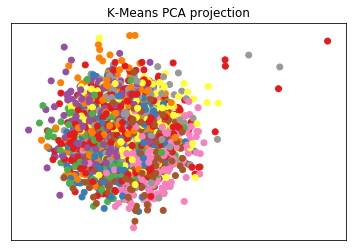

In [13]:
""" Fit into kmeans clustering method """
kmeans = KMeans(n_clusters=10).fit(data_features)
print('Shape of cluster centers:', kmeans.cluster_centers_.shape)
print('Shape of labels created by clusters:', kmeans.labels_.shape)

plot_embedding(subSpace, kmeans.labels_, 'K-Means PCA projection')
labels = mapLabels(kmeans.labels_, data_labels, 10)

Number of Leaves: 3017
Number of Connected Components 1


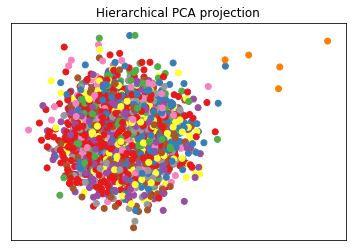

In [14]:
""" Fit into Hierarchical clustering method """
ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(data_features)
wlabel = ward.labels_
print('Number of Leaves:', ward.n_leaves_)
print('Number of Connected Components', ward.n_components_)

plot_embedding(subSpace, wlabel, 'Hierarchical PCA projection')
labels = mapLabels(wlabel, data_labels, 10)

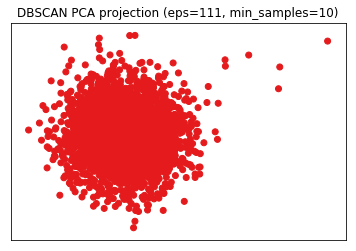

Number of clusters: 1


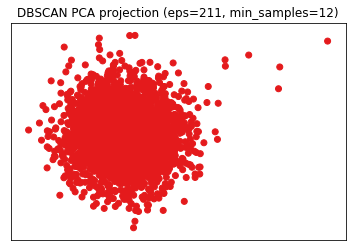

Number of clusters: 1


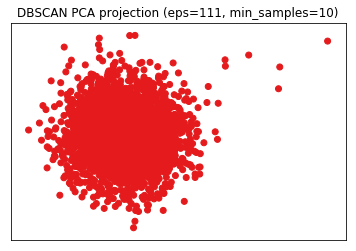

Number of clusters: 1


In [15]:
db = DBSCAN(eps=111, min_samples=10).fit(data_features)
dlabels = db.labels_
db1 = DBSCAN(eps=211, min_samples=12).fit(data_features)
dlabels1 = db1.labels_
db2 = DBSCAN(eps=111, min_samples=10).fit(data_features)
dlabels2 = db2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dlabels)) - (1 if -1 in dlabels else 0)
n_clusters_1 = len(set(dlabels1)) - (1 if -1 in dlabels1 else 0)
n_clusters_2 = len(set(dlabels2)) - (1 if -1 in dlabels2 else 0)

plot_embedding(subSpace, dlabels, 'DBSCAN PCA projection (eps=111, min_samples=10)')
labels = mapLabels(dlabels, data_labels, n_clusters_)
print('Number of clusters:', n_clusters_)
plot_embedding(subSpace, dlabels1, 'DBSCAN PCA projection (eps=211, min_samples=12)')
labels1 = mapLabels(dlabels1, data_labels, n_clusters_1)
print('Number of clusters:', n_clusters_1)
plot_embedding(subSpace, dlabels2, 'DBSCAN PCA projection (eps=111, min_samples=10)')
labels2 = mapLabels(dlabels2, data_labels, n_clusters_2)
print('Number of clusters:', n_clusters_2)

In [16]:
subSpace1 = TSNE(n_components=3).fit_transform(data_features)

Shape of cluster centers: (10, 99)
Shape of labels created by clusters: (3017,)


<Figure size 432x288 with 0 Axes>

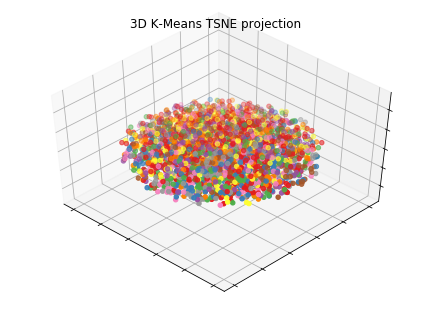

In [25]:
""" Fit into kmeans clustering method """
kmeans = KMeans(n_clusters=10).fit(data_features)
print('Shape of cluster centers:', kmeans.cluster_centers_.shape)
print('Shape of labels created by clusters:', kmeans.labels_.shape)

plot_embedding3d(subSpace1, kmeans.labels_, '3D K-Means TSNE projection')
labels = mapLabels(kmeans.labels_, data_labels, 10)

Number of Leaves: 3017
Number of Connected Components 1


<Figure size 432x288 with 0 Axes>

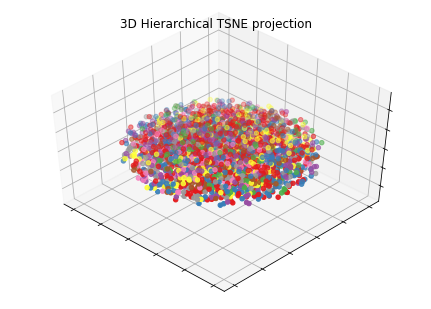

In [26]:
""" Fit into Hierarchical clustering method """
ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(data_features)
wlabel = ward.labels_
print('Number of Leaves:', ward.n_leaves_)
print('Number of Connected Components', ward.n_components_)

plot_embedding3d(subSpace1, wlabel, '3D Hierarchical TSNE projection')
labels = mapLabels(wlabel, data_labels, 10)

<Figure size 432x288 with 0 Axes>

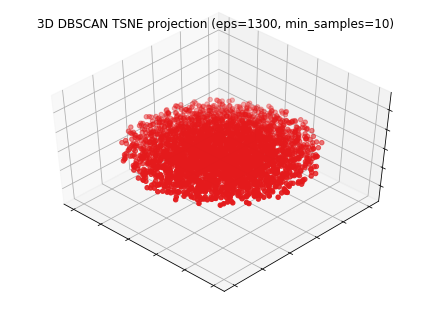

Number of clusters: 1


<Figure size 432x288 with 0 Axes>

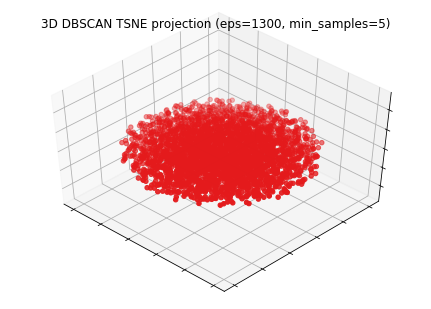

Number of clusters: 1


<Figure size 432x288 with 0 Axes>

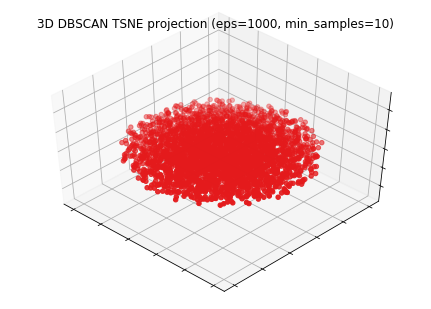

Number of clusters: 1


In [27]:
""" Fit into DBSCAN clustering method """
db = DBSCAN(eps=1300, min_samples=10).fit(data_features)
dlabels = db.labels_
db1 = DBSCAN(eps=1300, min_samples=5).fit(data_features)
dlabels1 = db1.labels_
db2 = DBSCAN(eps=1000, min_samples=10).fit(data_features)
dlabels2 = db2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dlabels)) - (1 if -1 in dlabels else 0)
n_clusters_1 = len(set(dlabels1)) - (1 if -1 in dlabels1 else 0)
n_clusters_2 = len(set(dlabels2)) - (1 if -1 in dlabels2 else 0)

plot_embedding3d(subSpace1, dlabels, '3D DBSCAN TSNE projection (eps=1300, min_samples=10)')
labels = mapLabels(dlabels, data_labels, n_clusters_)
print('Number of clusters:', n_clusters_)
plot_embedding3d(subSpace1, dlabels1, '3D DBSCAN TSNE projection (eps=1300, min_samples=5)')
labels1 = mapLabels(dlabels1, data_labels, n_clusters_1)
print('Number of clusters:', n_clusters_1)
plot_embedding3d(subSpace1, dlabels2, '3D DBSCAN TSNE projection (eps=1000, min_samples=10)')
labels2 = mapLabels(dlabels2, data_labels, n_clusters_2)
print('Number of clusters:', n_clusters_2)

In [28]:
from sklearn import tree
X = data_features
y = data_labels
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [29]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [56]:
from random import randint

user_ratings = [ ( randint(1, 20), k, randint(1, 10) ) for k in range(50,951) ]
ur_names = ['user_id','movie_id','rating']
ratings = pd.DataFrame.from_records(user_ratings,columns=ur_names)
user_profiles = [ ( k, randint(1, 2), randint(18, 22) ) for k in range(1,21) ]
up_names = ['user_id','sex','age']
users = pd.DataFrame.from_records(user_profiles,columns=up_names)
movie_names = ['display_title','mpaa_rating','byline','headline','summary_short']
items = pd.DataFrame.from_records(articles6,columns=movie_names)
#this generates the user profile
#20 users

In [57]:
ratings_train = ratings
user_ratings2 = [ ( randint(1, 20), k, randint(1, 10) ) for k in range(1,50) ]
ratings_test = pd.DataFrame.from_records(user_ratings2,columns=ur_names)

In [58]:
ratings_train.shape, ratings_test.shape

((901, 3), (49, 3))

In [59]:
n_users = 20
n_items = 1000
data_matrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1,line[2]-1] = line[3]

In [60]:
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [61]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [62]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

In [65]:
print(user_prediction.shape)
print(item_prediction.shape)

(20, 1000)
(20, 1000)


In [ ]:
if __name__ == '__main__':
    crawler = Crawler(
        url = "https://api.nytimes.com/svc/movies/v2",
        apikey='5105d7c0e53347269a428d1c212e7de5',
        start_offset=101,
        end_offset=101
    )

crawler.start()

In [ ]:
data_sampley = Word2Vec(articles6, min_count=1)
data_sample = data_sampley[data_sampley.wv.vocab]

data_features = data_sample[:, 1:]
data_labels = data_sample[:, 0]

In [ ]:
clf.predict([data_features[0]])

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

subSpace2 = TSNE().fit_transform(data_features)

X = subSpace2[:,0]
y = subSpace2[:,1]

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)


#X_test = np.arange([data_features[0]])[:, np.newaxis]
#y_1 = regr_1.predict(X_test)
#y_2 = regr_2.predict(X_test)


plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
#plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)))